In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('data/lionsgate-movies-data.csv')


pd.set_option('display.max_columns', 17)
pd.set_option('display.max_rows', 50)

# Exploratory Data Analysis

In [5]:
df.head()

,Unnamed: 0,Title,Directed by,Produced by,Starring,Cinematography,Edited by,Music by,Production companies,Distributed by,Release date,Running time,Language,Budget,Box office,Country,Written by
0,0,American Psycho,Mary Harron,"['Edward R. Pressman', 'Chris Hanley', 'Christ...","['Christian Bale', 'Willem Dafoe', 'Jared Leto...",Andrzej Sekuła,Andrew Marcus,John Cale,"['Edward R. Pressman Productions', 'Muse Produ...","['Lions Gate Films', '(United States)', 'Colum...",2000-01-21,102.0,English,7000000.0,34300000.0,NaN,NaN
1,1,The Big Kahuna,John Swanbeck,"['Elie Samaha', 'Kevin Spacey', 'Andrew Stevens']","['Kevin Spacey', 'Danny DeVito', 'Peter Facine...",Anastas N. Michos,Peggy Davis,Christopher Young,"['Franchise Pictures', 'Trigger Street Product...",Lions Gate Films,1999-09-16,90.0,English,7000000.0,3728888.0,United States,NaN
2,2,Women,Peter Greenaway,Kees Kasander,"['John Standing', 'Matthew Delamere', 'Vivian ...","['Reinier van Brummelen', 'Sacha Vierny']",Elmer Leupen,"['Frank Loesser', 'Giuseppe Verdi']",NaN,Lions Gate Films,1999-05-22,118.0,NaN,NaN,424123.0,NaN,Peter Greenaway
3,3,Jesus' Son,Alison Maclean,"['Elizabeth Cuthrell', 'Lydia Dean Pilcher', '...","['Billy Crudup', 'Samantha Morton', 'Denis Lea...",Adam Kimmel,"['Stuart Levy', 'Geraldine Peroni']",Joe Henry,"['Evenstar Films', 'Alliance Atlantis']",Lions Gate Films,1999-09-05,107.0,English,2500000.0,1302067.0,NaN,"['Elizabeth Cuthrell', 'David Urrutia', 'Oren ..."
4,4,But I'm a Cheerleader,Jamie Babbit,"['Leanna Creel', 'Andrea Sperling']","['Natasha Lyonne', 'Clea DuVall', 'Cathy Moria...",Jules Labarthe,Cecily Rhett,Pat Irwin,"['Ignite Entertainment', 'The Kushner-Locke Co...",Lions Gate Films,1999-09-12,88.0,English,1000000.0,2600000.0,United States,NaN


In [6]:
df.shape

(406, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            406 non-null    int64  
 1   Title                 406 non-null    object 
 2   Directed by           406 non-null    object 
 3   Produced by           405 non-null    object 
 4   Starring              405 non-null    object 
 5   Cinematography        393 non-null    object 
 6   Edited by             393 non-null    object 
 7   Music by              396 non-null    object 
 8   Production companies  303 non-null    object 
 9   Distributed by        404 non-null    object 
 10  Release date          403 non-null    object 
 11  Running time          400 non-null    float64
 12  Language              366 non-null    object 
 13  Budget                299 non-null    float64
 14  Box office            363 non-null    float64
 15  Country               3

In [8]:
df.describe()

,Unnamed: 0,Running time,Budget,Box office
count,406.000000,400.000000,2.990000e+02,3.630000e+02
mean,202.500000,103.977500,2.499192e+07,5.610875e+07
std,117.346353,14.095165,2.850393e+07,1.086273e+08
min,0.000000,75.000000,1.000000e+05,1.500000e+02
25%,101.250000,94.000000,6.000000e+06,3.859046e+06
50%,202.500000,102.000000,1.600000e+07,2.300000e+07
75%,303.750000,112.000000,3.000000e+07,6.175000e+07
max,405.000000,178.000000,1.600000e+08,8.650000e+08


In [9]:
df.isna().sum()

Unnamed: 0                0
Title                     0
Directed by               0
Produced by               1
Starring                  1
Cinematography           13
Edited by                13
Music by                 10
Production companies    103
Distributed by            2
Release date              3
Running time              6
Language                 40
Budget                  107
Box office               43
Country                 106
Written by              157
dtype: int64

In [11]:
df.duplicated().sum()

0

#### Conclusion
1. There is an unwanted column located at the first index, we may remove it
2. There's also quite a lot of nan value
3. Some of the rows' values are in a form of lists

# Feature Engineering
In this part, we will do some data cleaning this process includes;treating nan values, formatting unwanted values, adding new columns, and renaming the columns.

In [12]:
df.head(2)

,Unnamed: 0,Title,Directed by,Produced by,Starring,Cinematography,Edited by,Music by,Production companies,Distributed by,Release date,Running time,Language,Budget,Box office,Country,Written by
0,0,American Psycho,Mary Harron,"['Edward R. Pressman', 'Chris Hanley', 'Christ...","['Christian Bale', 'Willem Dafoe', 'Jared Leto...",Andrzej Sekuła,Andrew Marcus,John Cale,"['Edward R. Pressman Productions', 'Muse Produ...","['Lions Gate Films', '(United States)', 'Colum...",2000-01-21,102.0,English,7000000.0,34300000.0,NaN,NaN
1,1,The Big Kahuna,John Swanbeck,"['Elie Samaha', 'Kevin Spacey', 'Andrew Stevens']","['Kevin Spacey', 'Danny DeVito', 'Peter Facine...",Anastas N. Michos,Peggy Davis,Christopher Young,"['Franchise Pictures', 'Trigger Street Product...",Lions Gate Films,1999-09-16,90.0,English,7000000.0,3728888.0,United States,NaN


In [13]:
class FE:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def drop_col(self):
        col = 'Unnamed: 0'
        try:
            self.dataframe.drop(col, axis=1, inplace=True)
        except:
            pass
        
        
    def rename_col(self):
        columns = self.dataframe.columns
        self.dataframe.columns = [column.lower().replace(' ', '_') for column in columns]
        
    
    def add_col(self):
        new_columns = ['year', 'month', 'date']
        for index, row in enumerate(self.dataframe.release_date):
            try:
                for column, value in zip(new_columns, row.split('-')):
                    self.dataframe.loc[index, column] = value
            except:
                pass
        
        
    def fix_value(self):
        columns = self.dataframe.select_dtypes(include=np.object).columns
        fix_val = FixValue(self.dataframe, columns)
        fix_val.get_val()

In [14]:
class FixValue(FE):
    fmt = r"'([^']*)'"
    
    def __init__(self, dataframe, columns):
        super().__init__(dataframe)
        self.columns = columns

        
    def converter(self, row):
        try:
            val = re.findall(FixValue.fmt, row)
            val_len = len(val)
            
            if val_len == 0:
                return row
            else:
                converted_val = str()
                for item in val:
                    converted_val += f'{item}, '
                return converted_val
        except:
            return None
        
    def get_val(self):
        for column in self.columns:
            rows = self.dataframe[column]
            for index, row in enumerate(rows):
                result = self.converter(row)
                
                self.dataframe.loc[index, column] = result

In [18]:
fe = FE(df)
fe.drop_col()
fe.rename_col()
fe.add_col()
fe.fix_value()

C:\Users\USER\AppData\Local\Temp/ipykernel_5524/3877200614.py:29: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  columns = self.dataframe.select_dtypes(include=np.object).columns


In [19]:
df.head(2)

,title,directed_by,produced_by,starring,cinematography,edited_by,music_by,production_companies,...,language,budget,box_office,country,written_by,year,month,date
0,American Psycho,Mary Harron,"Edward R. Pressman, Chris Hanley, Christian Ha...","Christian Bale, Willem Dafoe, Jared Leto, Josh...",Andrzej Sekuła,Andrew Marcus,John Cale,"Edward R. Pressman Productions, Muse Productio...",...,English,7000000.0,34300000.0,None,None,2000,01,21
1,The Big Kahuna,John Swanbeck,"Elie Samaha, Kevin Spacey, Andrew Stevens,","Kevin Spacey, Danny DeVito, Peter Facinelli,",Anastas N. Michos,Peggy Davis,Christopher Young,"Franchise Pictures, Trigger Street Productions,",...,English,7000000.0,3728888.0,United States,None,1999,09,16


# Data Visualization

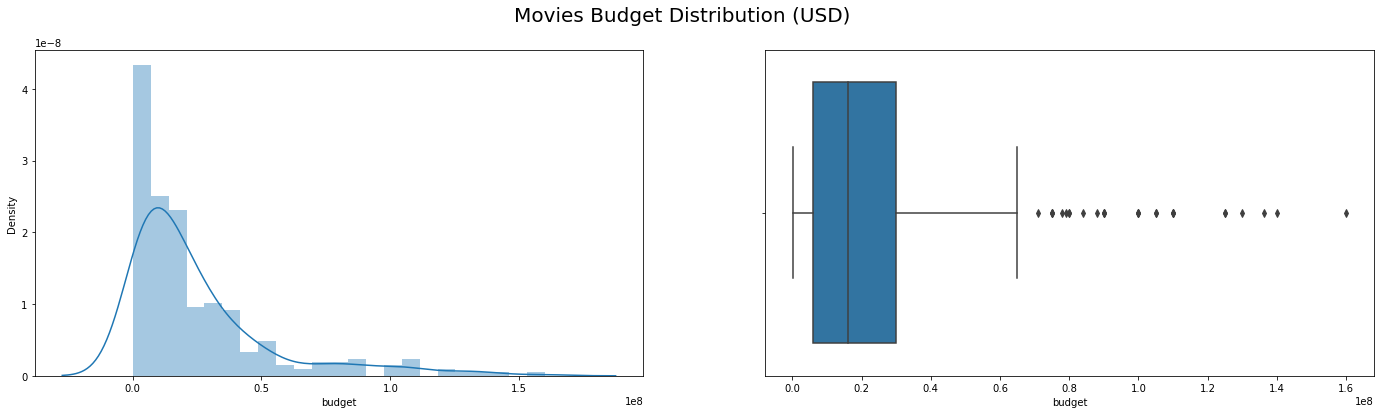

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
fig.suptitle('Movies Budget Distribution (USD)\n\n', fontsize=20)

sns.distplot(df.budget, ax=ax1)
sns.boxplot(ax=ax2, data=df, x='budget')

plt.show()

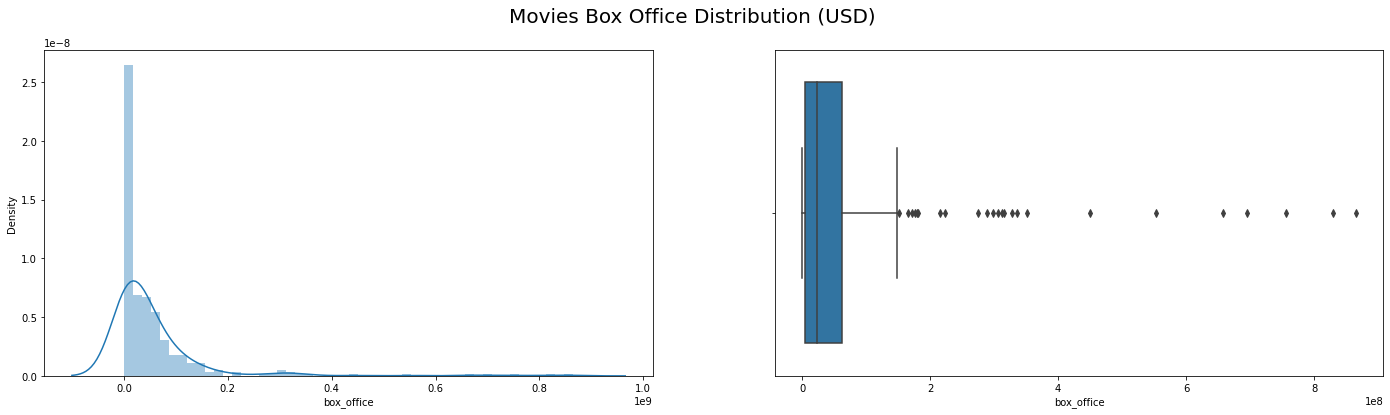

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
fig.suptitle('Movies Box Office Distribution (USD)\n\n', fontsize=20)

sns.distplot(df.box_office, ax=ax1)
sns.boxplot(ax=ax2, data=df, x='box_office')

plt.show()

Our plots definitely don't look very aesthetic since we have a lot of outliers and nan values in the data. However, I don't really want to mess with the outliers since it's the true value of how much the movie was generating money.

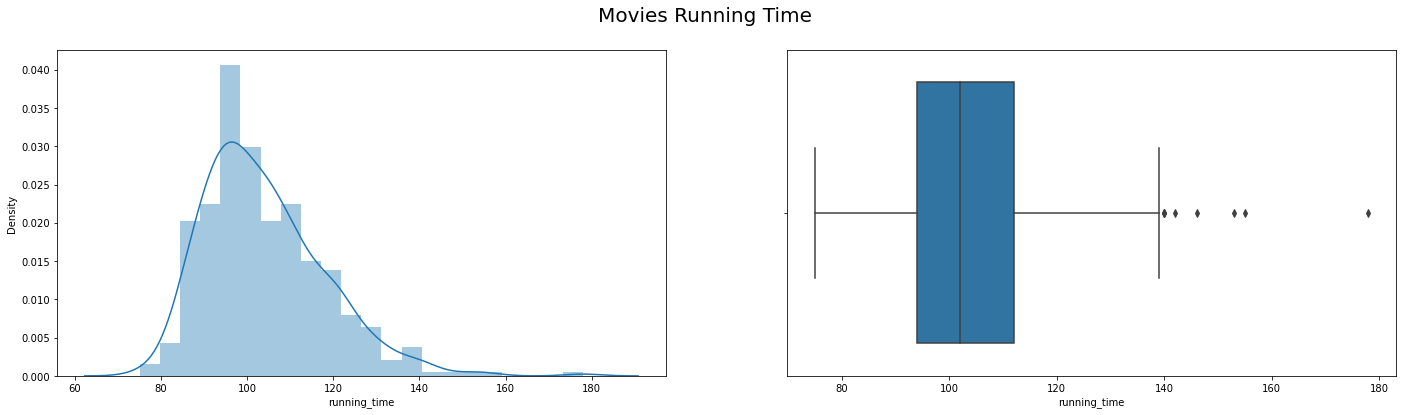

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
fig.suptitle('Movies Running Time\n\n', fontsize=20)

sns.distplot(df.running_time, ax=ax1)
sns.boxplot(ax=ax2, data=df, x='running_time')

plt.show()

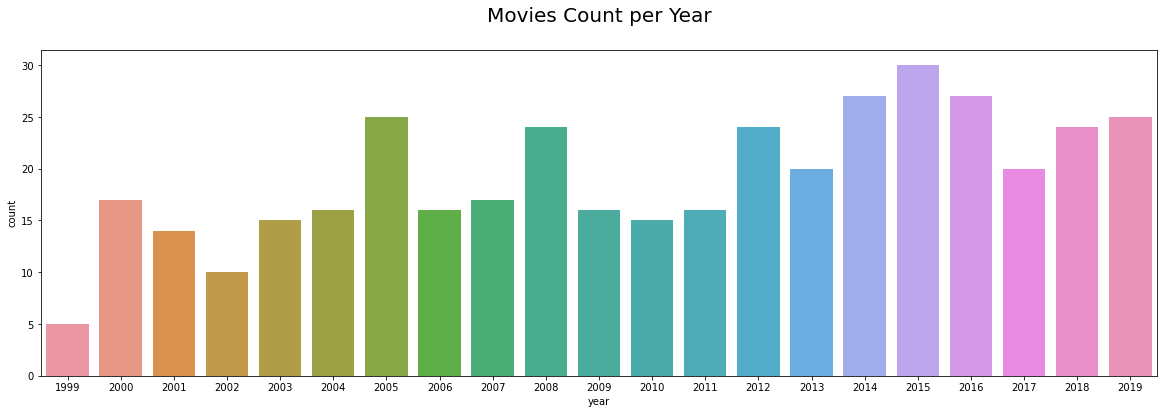

In [27]:
plt.figure(figsize=(20,6))
sns.countplot(data=df.sort_values(by='year'), x='year')
plt.title('Movies Count per Year\n', fontsize=20)
plt.show()

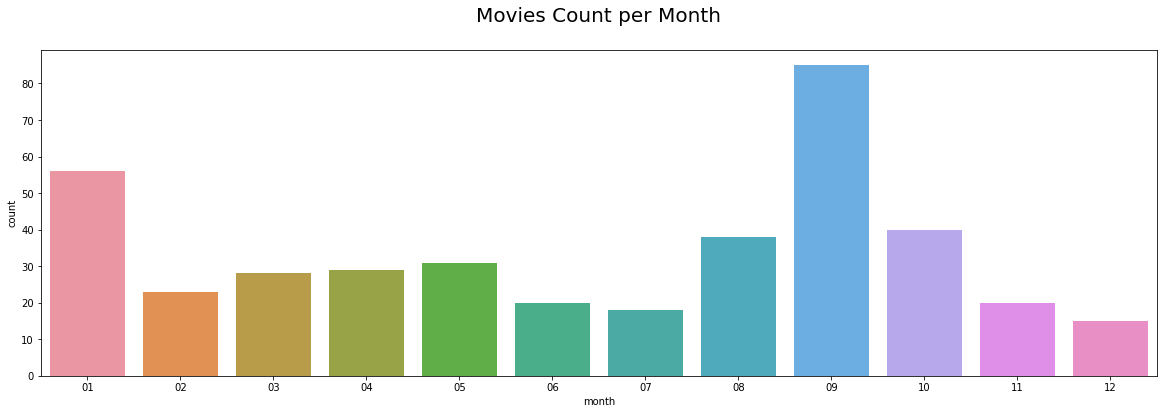

In [41]:
plt.figure(figsize=(20,6))
sns.countplot(data=df.sort_values(by='month'), x='month')
plt.title('Movies Count per Month\n', fontsize=20)
plt.show()

### Average Budget, Box Office, and Running Time each Year

In [29]:
year_group = df.groupby('year')
years = [year for year, df in year_group]
years_data = list()

for year in years:
    year_dict = dict()
    year_dict['year'] = year
    for col in ['budget', 'box_office', 'running_time']:
        val = df[df.year == year][col].mean()
        year_dict[f'med_{col}'] = val
    years_data.append(year_dict)
    
df_year = pd.DataFrame(years_data)

df_year.med_budget = df_year.med_budget.apply(lambda x: x/1000000)
df_year.med_box_office = df_year.med_box_office.apply(lambda x: x/1000000)

In [30]:
df_year.head()

,year,med_budget,med_box_office,med_running_time
0,1999,3.500000,1.632435,102.800000
1,2000,8.062500,9.664150,104.705882
2,2001,4.061111,8.572040,104.142857
3,2002,3.871429,8.837626,98.400000
4,2003,7.029091,14.083786,100.733333


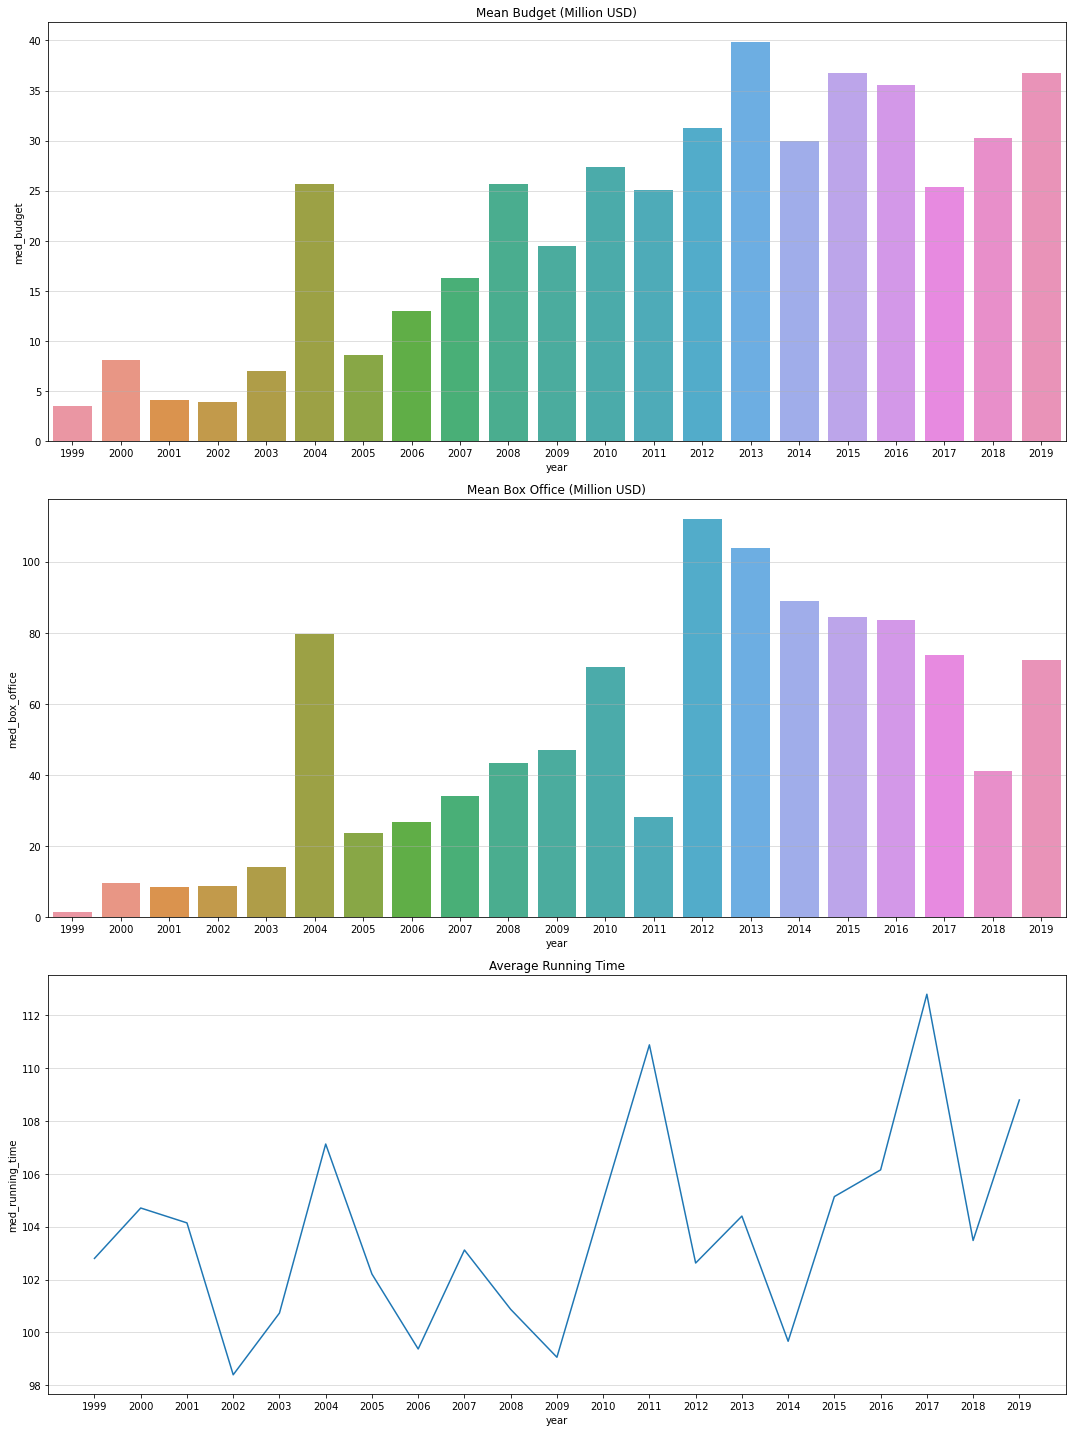

In [33]:
figure, axes = plt.subplots(3,1, figsize=(15,20))

sns.barplot(ax=axes[0], data=df_year, x='year', y='med_budget')
axes[0].set_title('Mean Budget (Million USD)')
axes[0].grid(axis='y', alpha=0.5)

sns.barplot(ax=axes[1], data=df_year, x='year', y='med_box_office')
axes[1].set_title('Mean Box Office (Million USD)')
axes[1].grid(axis='y', alpha=0.5)

sns.lineplot(ax=axes[2], data=df_year, x='year', y='med_running_time')
axes[2].set_title('Average Running Time')
axes[2].grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

### Top 10 Movies Sales and Budget

In [34]:
top10_revenue = df.sort_values(by='box_office', ascending=False)[['title', 'box_office']].head(10)
top10_revenue.box_office = top10_revenue.box_office.apply(lambda x: x/1000000)

top10_budget = df.sort_values(by='budget', ascending=False)[['title', 'budget']].head(10)
top10_budget.budget = top10_budget.budget.apply(lambda x: x/1000000)

top10_longest = df.sort_values(by='running_time', ascending=False)[['title', 'running_time']].head(10)

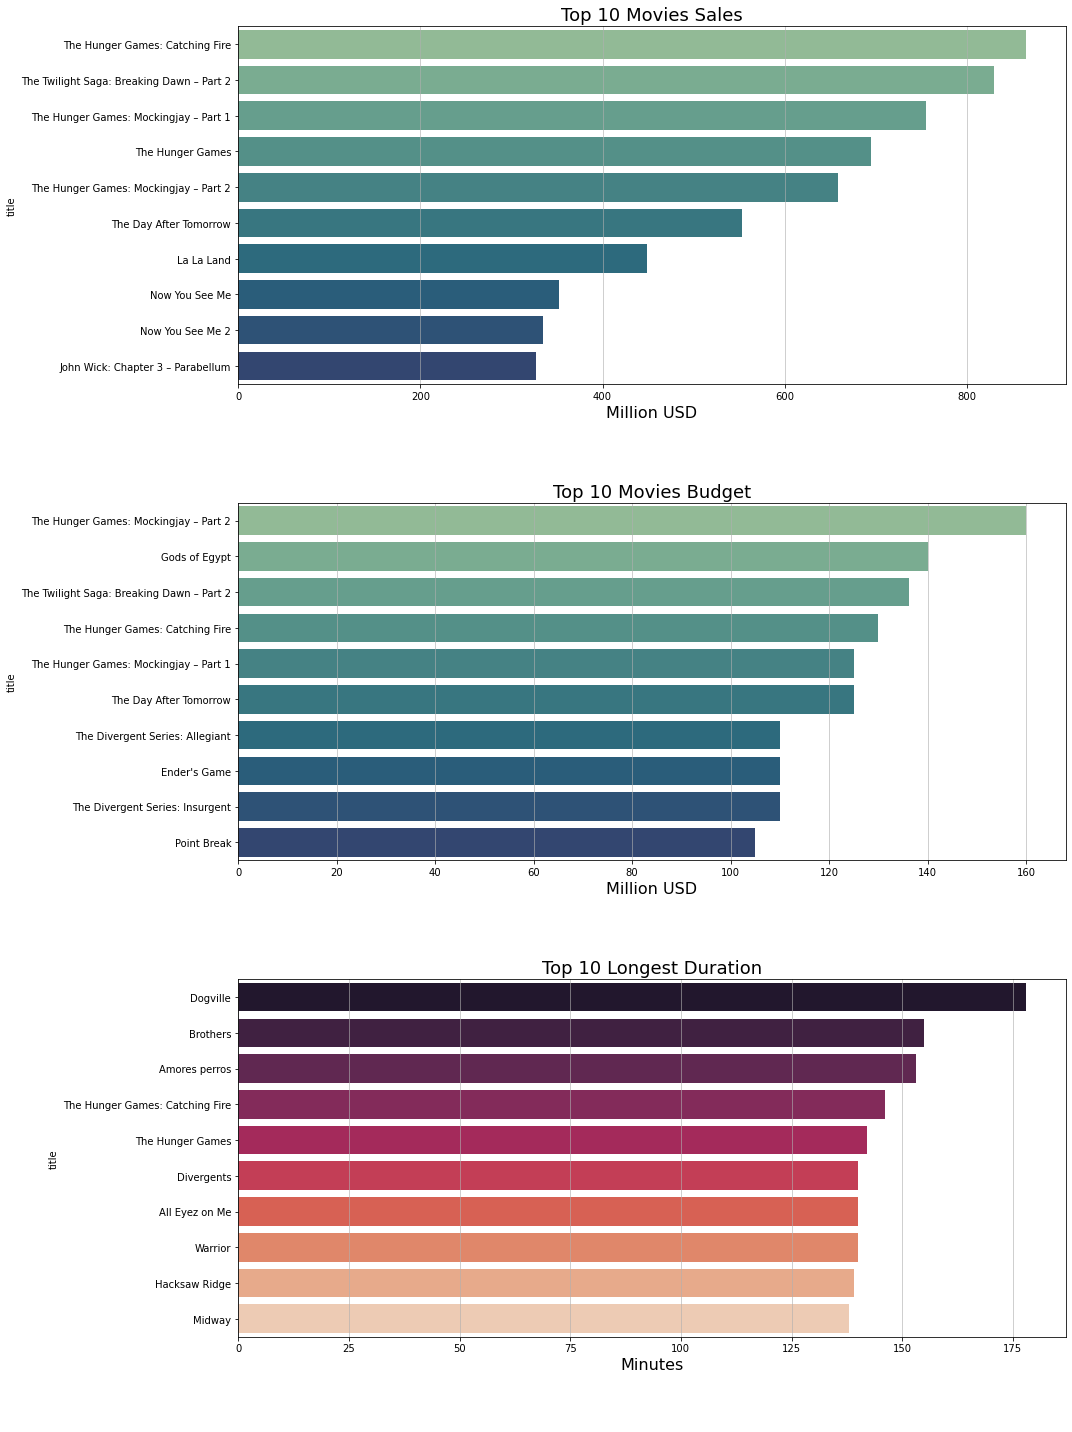

In [35]:
figure, axes = plt.subplots(3,1, figsize=(15,20))

sns.barplot(ax=axes[0] ,data=top10_revenue, x='box_office', y='title', palette='crest')
axes[0].set_title('Top 10 Movies Sales', fontsize=18)
axes[0].set_xlabel('Million USD\n\n\n', fontsize=16)
axes[0].grid(axis='x', alpha=0.75)

sns.barplot(ax=axes[1] ,data=top10_budget, x='budget', y='title', palette='crest')
axes[1].set_title('Top 10 Movies Budget', fontsize=18)
axes[1].set_xlabel('Million USD\n\n\n', fontsize=16)
axes[1].grid(axis='x', alpha=0.75)

sns.barplot(ax=axes[2] ,data=top10_longest, x='running_time', y='title', palette='rocket')
axes[2].set_title('Top 10 Longest Duration', fontsize=18)
axes[2].set_xlabel('Minutes\n\n\n', fontsize=16)
axes[2].grid(axis='x', alpha=0.75)

plt.tight_layout()
plt.show()

### Top 10 Movies with Greatest Profits and Loss

In [36]:
df['profit'] = df.box_office - df.budget

In [37]:
top10_profit = df.sort_values(by='profit', ascending=False)[['title', 'profit', 'budget', 'box_office']].head(10)
for col in ['profit', 'budget', 'box_office']:
    top10_profit[col] = top10_profit[col].apply(lambda x: x/1000000)

top10_loss = df.sort_values(by='profit')[['title', 'profit', 'budget', 'box_office']].head(10)
for col in ['profit', 'budget', 'box_office']:
    top10_loss[col] = top10_loss[col].apply(lambda x: x/1000000)

In [38]:
top10_profit.head()

,title,profit,budget,box_office
246,The Hunger Games: Catching Fire,735.0,130.0,865.0
228,The Twilight Saga: Breaking Dawn – Part 2,693.5,136.2,829.7
275,The Hunger Games: Mockingjay – Part 1,630.4,125.0,755.4
211,The Hunger Games,616.4,78.0,694.4
306,The Hunger Games: Mockingjay – Part 2,498.3,160.0,658.3


In [39]:
top10_loss.head()

,title,profit,budget,box_office
197,Saving Private Perez,-40.669535,50.0,9.330465
288,Child 44,-37.000000,50.0,13.000000
334,Rock Dog,-35.900000,60.0,24.100000
279,Mortdecai,-31.900000,79.2,47.300000
200,Machine Gun Preacher,-26.700000,30.0,3.300000


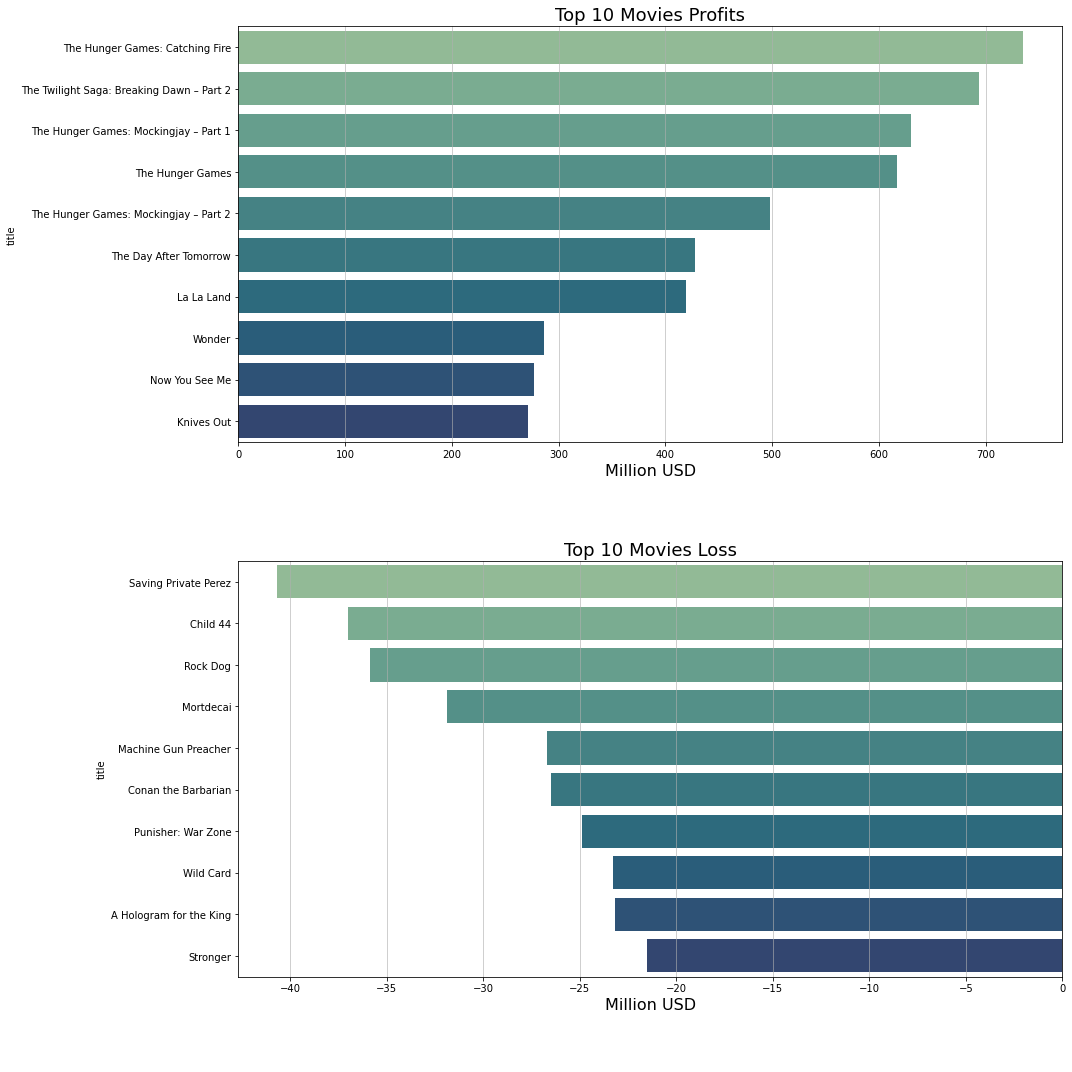

In [40]:
figure, axes = plt.subplots(2,1, figsize=(15,15))

sns.barplot(ax=axes[0] ,data=top10_profit, x='profit', y='title', palette='crest')
axes[0].set_title('Top 10 Movies Profits', fontsize=18)
axes[0].set_xlabel('Million USD\n\n\n', fontsize=16)
axes[0].grid(axis='x', alpha=0.75)

sns.barplot(ax=axes[1] ,data=top10_loss, x='profit', y='title', palette='crest')
axes[1].set_title('Top 10 Movies Loss', fontsize=18)
axes[1].set_xlabel('Million USD\n\n\n', fontsize=16)
axes[1].grid(axis='x', alpha=0.75)

plt.tight_layout()
plt.show()